In [183]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [185]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/credit_dataset.csv")
df

,customer_id,balance_number,balance_frequency,purchases_number,purchases_conditional,purchases_installment,purchases_cash,purchases_frequency,purchases_frequency_conditional,purchases_frequency_installment,...,purchases_cash_advance,purchases_trx,limit_credit,payment_number,payment_minimum,payment_total,tenure,tax_number,tax_cash,tax_total
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,NaN,NaN,NaN
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,NaN,NaN,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,NaN,NaN,NaN
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,NaN,0.000000,12,NaN,NaN,NaN
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6,NaN,NaN,NaN
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,275.861322,NaN,0.000000,6,NaN,NaN,NaN
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6,NaN,NaN,NaN
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,NaN,NaN,NaN


In [186]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      8950 non-null   object 
 1   balance_number                   8950 non-null   float64
 2   balance_frequency                8950 non-null   float64
 3   purchases_number                 8950 non-null   float64
 4   purchases_conditional            8950 non-null   float64
 5   purchases_installment            8950 non-null   float64
 6   purchases_cash                   8950 non-null   float64
 7   purchases_frequency              8950 non-null   float64
 8   purchases_frequency_conditional  8950 non-null   float64
 9   purchases_frequency_installment  8950 non-null   float64
 10  purchases_cash_frequency         8950 non-null   float64
 11  purchases_cash_advance           8950 non-null   int64  
 12  purchases_trx       

In [187]:
df.isna().sum()

customer_id                           0
balance_number                        0
balance_frequency                     0
purchases_number                      0
purchases_conditional                 0
purchases_installment                 0
purchases_cash                        0
purchases_frequency                   0
purchases_frequency_conditional       0
purchases_frequency_installment       0
purchases_cash_frequency              0
purchases_cash_advance                0
purchases_trx                         0
limit_credit                          1
payment_number                        0
payment_minimum                     313
payment_total                         0
tenure                                0
tax_number                         8950
tax_cash                           8950
tax_total                          8950
dtype: int64

<Axes: >

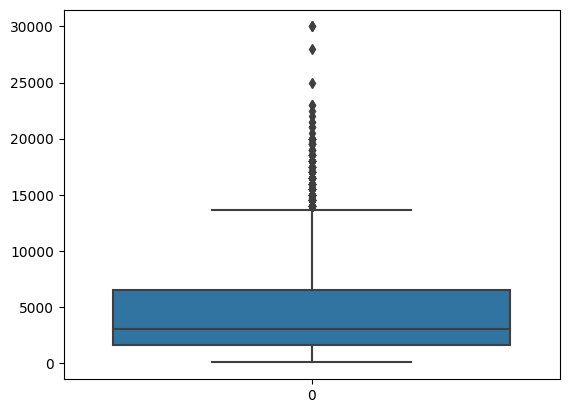

In [188]:
sns.boxplot(df['limit_credit'])

In [189]:
df.loc[df["limit_credit"]<15000, "limit_credit"] = np.nan
df.loc[df["limit_credit"]>25000, "limit_credit"] = np.nan

In [190]:
df.isna().sum()

customer_id                           0
balance_number                        0
balance_frequency                     0
purchases_number                      0
purchases_conditional                 0
purchases_installment                 0
purchases_cash                        0
purchases_frequency                   0
purchases_frequency_conditional       0
purchases_frequency_installment       0
purchases_cash_frequency              0
purchases_cash_advance                0
purchases_trx                         0
limit_credit                       8767
payment_number                        0
payment_minimum                     313
payment_total                         0
tenure                                0
tax_number                         8950
tax_cash                           8950
tax_total                          8950
dtype: int64

In [191]:
df["payment_minimum"].fillna(value=df["payment_minimum"].mean(), inplace=True)
df["limit_credit"].fillna(value=df["limit_credit"].mean(), inplace=True)

In [192]:
df_clean = df.drop(["customer_id", "tax_number", "tax_cash", "tax_total"], axis=1)

In [193]:
df_clean.isna().sum()

balance_number                     0
balance_frequency                  0
purchases_number                   0
purchases_conditional              0
purchases_installment              0
purchases_cash                     0
purchases_frequency                0
purchases_frequency_conditional    0
purchases_frequency_installment    0
purchases_cash_frequency           0
purchases_cash_advance             0
purchases_trx                      0
limit_credit                       0
payment_number                     0
payment_minimum                    0
payment_total                      0
tenure                             0
dtype: int64

In [194]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   balance_number                   8950 non-null   float64
 1   balance_frequency                8950 non-null   float64
 2   purchases_number                 8950 non-null   float64
 3   purchases_conditional            8950 non-null   float64
 4   purchases_installment            8950 non-null   float64
 5   purchases_cash                   8950 non-null   float64
 6   purchases_frequency              8950 non-null   float64
 7   purchases_frequency_conditional  8950 non-null   float64
 8   purchases_frequency_installment  8950 non-null   float64
 9   purchases_cash_frequency         8950 non-null   float64
 10  purchases_cash_advance           8950 non-null   int64  
 11  purchases_trx                    8950 non-null   int64  
 12  limit_credit        

In [195]:
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df_clean)

##Modelling data saya menggunakan metode dbscan, karena data yg digunakan cukup banyak.

7.4197417076235235


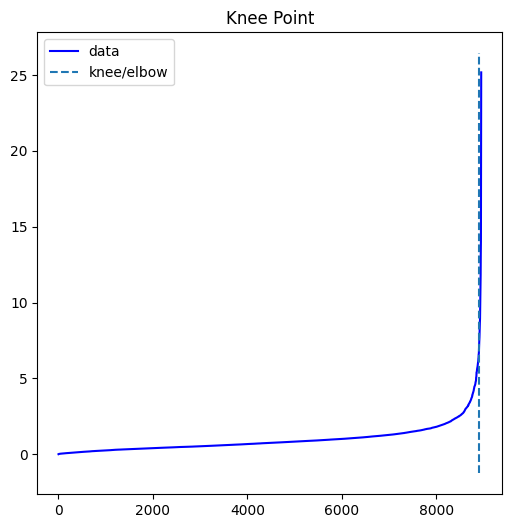

In [196]:
nbrs = NearestNeighbors().fit(scaled_data)
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_data)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:,4]
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S=1.0,
                      curve="concave", direction = "increasing", online=True)
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()

In [197]:
clusters = DBSCAN(eps = 7.3, min_samples = 4).fit(scaled_data)
label= clusters.labels_
np.unique(label)

array([-1,  0])

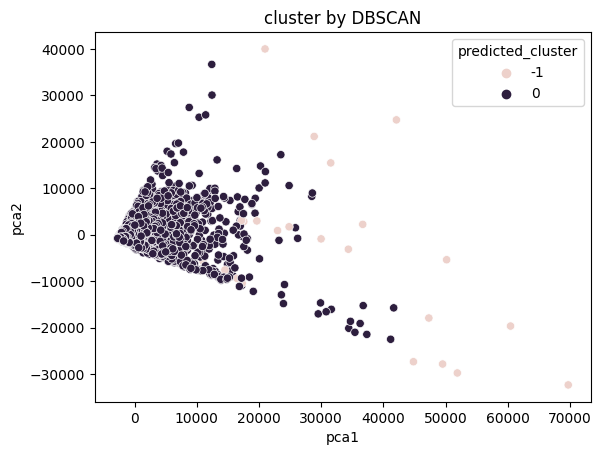

In [198]:
df["predicted_cluster"]= label


reduced_data= PCA(n_components=2).fit_transform(df_clean)
df_reduced_data= pd.DataFrame(reduced_data, columns=["pca1","pca2"])
sns.scatterplot(x="pca1", y="pca2", hue=df["predicted_cluster"],data=df_reduced_data)
plt.title("cluster by DBSCAN")
plt.show()

In [199]:
ss = silhouette_score(df_clean, label)
print(f"Akurasi berdasarkan Silhouette score adalah: {ss}")

Akurasi berdasarkan Silhouette score adalah: 0.8697344337687081
